In [8]:
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline
import numpy as np
from pract2_utils import *
from sklearn.cluster import KMeans, Birch
import matplotlib.pyplot as plt



In [13]:
accidentes = pd.read_csv('accidentes_2013.csv')
np.unique(accidentes['LUMINOSIDAD'])
accidentes = pd.read_csv('accidentes_2013.csv')

dfSol = accidentes[(accidentes.FACTORES_ATMOSFERICOS == 'BUEN TIEMPO')&
                       ((accidentes.TIPO_VIA == 'VÍA CONVENCIONAL')
                        |(accidentes.TIPO_VIA == 'VÍA CONVENCIONAL CON CARRIL LENTO'))]

dfLluvia = accidentes[((accidentes.TIPO_VIA == 'VÍA CONVENCIONAL')
                    |(accidentes.TIPO_VIA == 'VÍA CONVENCIONAL CON CARRIL LENTO'))&
                      ((accidentes.FACTORES_ATMOSFERICOS == 'LLOVIZNANDO')|
                       (accidentes.FACTORES_ATMOSFERICOS == 'LLUVIA FUERTE'))]

atributos = ['TOT_VICTIMAS','TOT_MUERTOS','TOT_HERIDOS_GRAVES', 'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS']

#Datos en forma matricial
dataSol = to_matrix(dfSol, atributos)
dataLluvia = to_matrix(dfLluvia, atributos)

#Datos Normalizados
data_normSol = norm(dataSol)
data_normLluvia = norm(dataLluvia)

In [ ]:
accidentes = pd.read_csv('accidentes_2013.csv')
np.unique(accidentes['ZONA'])

In [16]:
dfLluvia.columns

Index(['TOT_VICTIMAS', 'TOT_MUERTOS', 'TOT_HERIDOS_GRAVES',
       'TOT_HERIDOS_LEVES', 'TOT_VEHICULOS_IMPLICADOS'],
      dtype='object')

In [15]:
del(dfLluvia['TOT_VICTIMAS30D'])
del(dfLluvia['TOT_MUERTOS30D'])
del(dfLluvia['TOT_HERIDOS_GRAVES30D'])
del(dfLluvia['TOT_HERIDOS_LEVES30D'])
del(dfSol['TOT_VICTIMAS30D'])
del(dfSol['TOT_MUERTOS30D'])
del(dfSol['TOT_HERIDOS_GRAVES30D'])
del(dfSol['TOT_HERIDOS_LEVES30D'])


In [ ]:
aux = scatter_matrix(dfLluvia.loc[:,'TOT_VICTIMAS':'TOT_VEHICULOS_IMPLICADOS'], alpha=0.2, figsize=(15,15))
plt.savefig('./ScatterMatrixLluvia.png')

In [ ]:
plt.title('SCATTER_MATRIX LLUVIA')
scatter_matrix(dfSol.loc[:,'TOT_VICTIMAS':'TOT_VEHICULOS_IMPLICADOS'], alpha=0.2, figsize=(15,15))
plt.savefig('./ScatterMatrixSol.png')

C:\Users\quesa\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


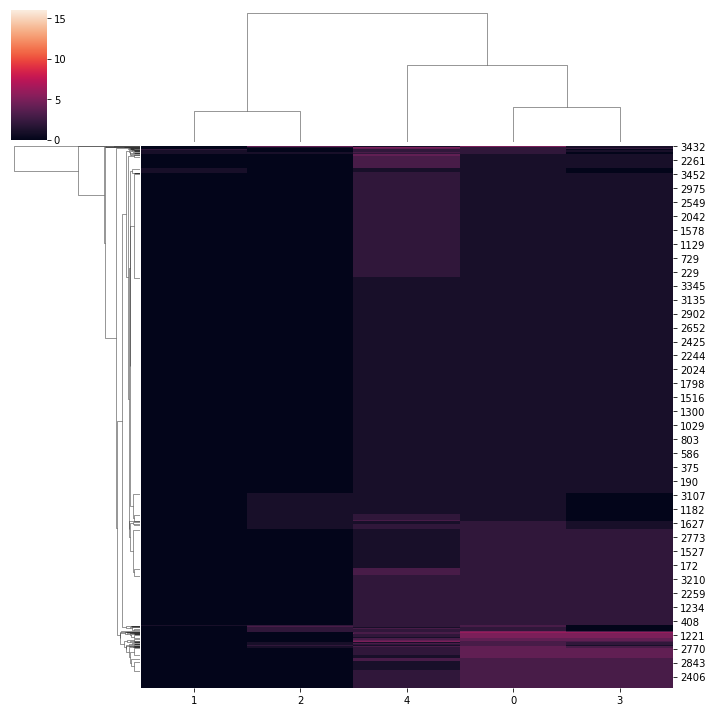

In [17]:
sns.clustermap(dataLluvia)
plt.savefig('./DendoGramaLluvia.png')

In [ ]:
sns.clustermap(dataSol)
plt.savefig('./DendoGramaLluvia.png')

In [ ]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(28,15)})
sns.countplot('ZONA',data=accidentes,hue = 'TOT_VICTIMAS')
plt.savefig('./GRAFICO DE APOYO Caso2Zona' +'.png')

In [ ]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(18,10)})
sns.countplot('LUMINOSIDAD',data=accidentes,hue = 'TOT_VICTIMAS')
plt.savefig('./GRAFICO DE APOYO Caso2Luminosidad' +'.png')